In [1]:
import pandas as pd
import numpy as np

In [2]:
def read_data(n): 
    """
    s rows
    s' cols
    """
    data = open(f"prob_a{n}.txt").read()
    a = np.zeros((81,81))
    for d in data.split("\n"): 
        vals = [float(a) for a in d.split(" ") if a != ""]
        if len(vals) == 3: 
            a[int(vals[0] - 1)][int(vals[1] - 1)]  = vals[2]
    return a

def rewards_data(): 
    data = open("rewards.txt").read()
    data = data.split("\n")
    return np.array([int(x.strip()) for x in data]).reshape(-1, 1)

In [3]:
a1 = read_data(1)
a2 = read_data(2)
a3 = read_data(3)
a4 = read_data(4)
trans = {0: a1, 
        1: a2, 
        2: a3, 
        3: a4}
v = np.zeros((81,1))
pi = np.zeros((81,1))

rewards = rewards_data()

gamma = .99

In [4]:
def ValueIteration(trans, rewards, gamma=0.5, max_iters=10, thresh=1e-4):
    ns = rewards.shape[0]
    na = 4
    Q = np.zeros((ns,na))
    V = np.ones((ns, 1))
    cnt = 0
    while cnt < max_iters: 
        Vold = V.copy()
        for s in range(ns): 
            vbuffer = []
            for a in range(na): 
                sum_sp = rewards[s][0] 
                sum_v = 0 
                for sprime in range(ns): 
                    sum_sp += gamma*max(Q[sprime])*trans[a][s][sprime]
                    sum_v += trans[a][s][sprime] * V[sprime] 
                Q[s][a] = sum_sp
                vbuffer.append(rewards[s] + gamma * sum_v)
            V[s] = max(vbuffer)
        cnt += 1
        if (max(V - Vold)) < thresh: 
            break
        if (cnt % 25 == 0): 
            print(f"Iter: {cnt}")
    pi =  Q.argmax(axis=1)
    return Q, V, pi
Q, v, pi = ValueIteration(trans, rewards, gamma, 1000, 1)

In [8]:
Q.shape

(81, 4)

In /home/rose/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/rose/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/rose/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/rose/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/rose/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_c

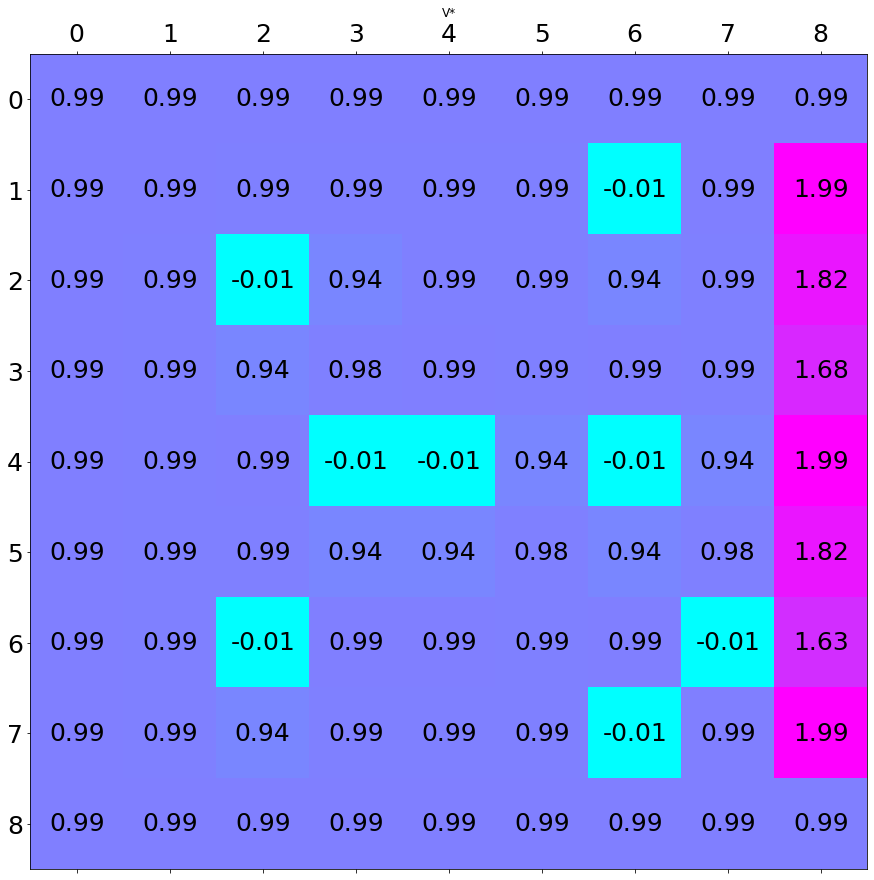

In [6]:
import matplotlib.pyplot as plt
data = np.flip(np.rot90(v.reshape(9,9)), 0)

num = data.shape[0]

fig, ax = plt.subplots(figsize=(15,15))



ax.matshow(data, aspect='auto', cmap='cool')
ax.set(title='V*', xticks=range(num),yticks=range(num))
ax.tick_params(labelsize=25)

for (i, j), val in np.ndenumerate(data):
    ax.annotate('{:0.2f}'.format(val), (j,i), ha='center', va='center', size=25)

plt.show()

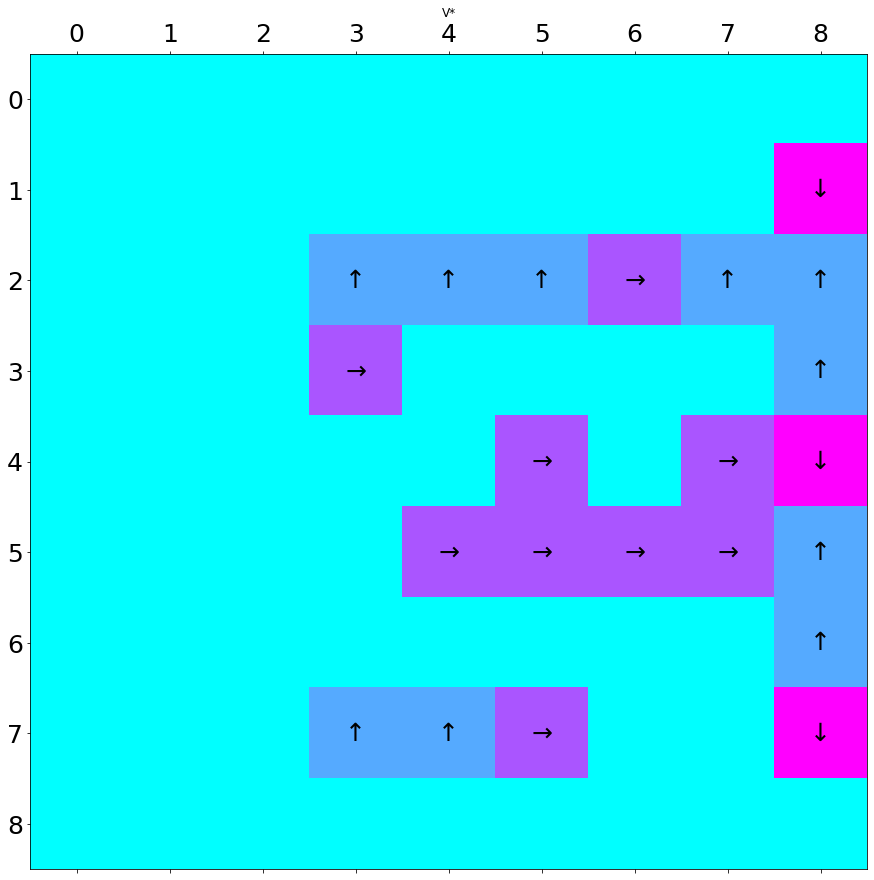

In [7]:
data = np.flip(np.rot90(pi.reshape(9,9)), 0)

num = data.shape[0]

fig, ax = plt.subplots(figsize=(15,15))


ax.matshow(data, aspect='auto', cmap='cool')
ax.set(title='V*', xticks=range(num),yticks=range(num))
ax.tick_params(labelsize=25)
dirs = ["","\u2191", "\u2192", "\u2193"]
for (i, j), val in np.ndenumerate(data):
    ax.annotate('{}'.format(dirs[val]), (j,i), ha='center', va='center', size=25)

plt.show()